In [ ]:
''' download MNIST dataset '''

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1);


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
print(mnist.keys());

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


(70000, 784)


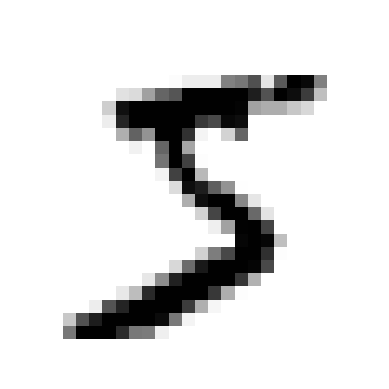

In [ ]:
''' look at one of the images'''

import matplotlib as mpl
import matplotlib.pyplot as plt

print(X.shape);
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28);

plt.imshow(some_digit_image, cmap="binary");
plt.axis("off");
plt.show();

In [ ]:
y[0]

'5'

In [ ]:
import numpy as np
y = y.astype(np.uint8)
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8


In [ ]:
''' create training and test data'''

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
''' start by focusing on a basic binary classifier for the number 5'''

y_train_5 = (y_train == 5);
Y_test_5 = (y_test == 5);

In [ ]:
''' train a Stochastic Gradient descent model and make a prediction'''

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42);
sgd_clf.fit(X_train, y_train_5);

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(sgd_clf.predict([some_digit]));

[ True]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
'''measure the base accuracy of this classifier'''
from sklearn.model_selection import cross_val_score

print(cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy"));

[0.95035 0.96035 0.9604 ]


In [ ]:
'''define the predictions'''

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3);

In [ ]:
'''create confusion matrix'''

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, y_train_pred));

[[53892   687]
 [ 1891  3530]]


In [ ]:
''' calculate precision and recall'''

from sklearn.metrics import precision_score, recall_score
print("Precision:",precision_score(y_train_5, y_train_pred));
print("Recall:",recall_score(y_train_5, y_train_pred));

Predcision: 0.8370879772350012
Recall: 0.6511713705958311


In [ ]:
''' calculcate F1 score'''
from sklearn.metrics import f1_score;

print("F1:", f1_score(y_train_5, y_train_pred));

F1: 0.7325171197343846


In [ ]:
'''in order to plot the precision and recall to back into a threshold, provide the decision scores'''
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function");

In [ ]:
''' calcculate the precisions, recalls, and thresholds'''

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores);

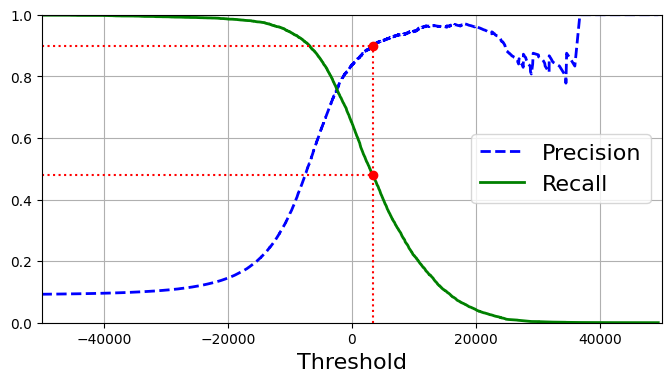

In [ ]:
''' plot the threshold relative to the recall and precision'''
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

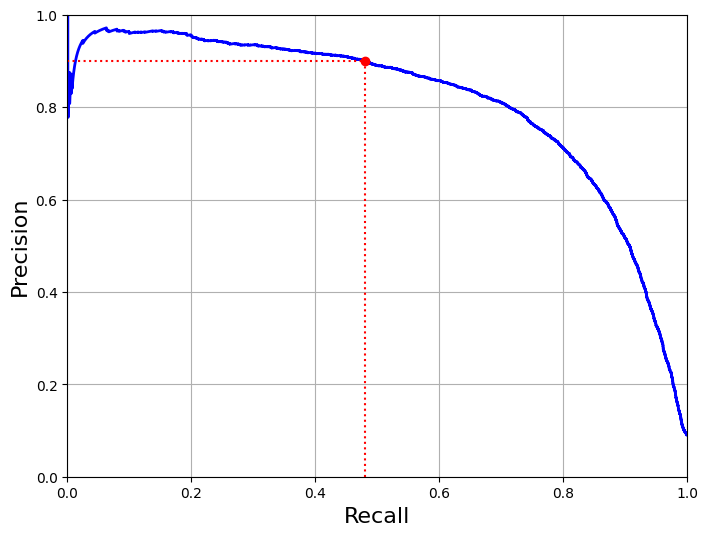

In [ ]:
'''plot precision vs recall'''
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

In [ ]:
'''show what the precision and recall look like with 90% precision'''

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)];

y_train_pred_90 = (y_scores >= threshold_90_precision);

print("Precision:", precision_score(y_train_5, y_train_pred_90));
print("Recall:", recall_score(y_train_5, y_train_pred_90));

Precision: 0.9000345901072293
Recall: 0.4799852425751706


In [ ]:
''' as an alternative to the precision/recall curve, calculate the false positive rate, true positive rate, and thresholds to present an ROC Curve'''
from sklearn.metrics import roc_curve;

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores);

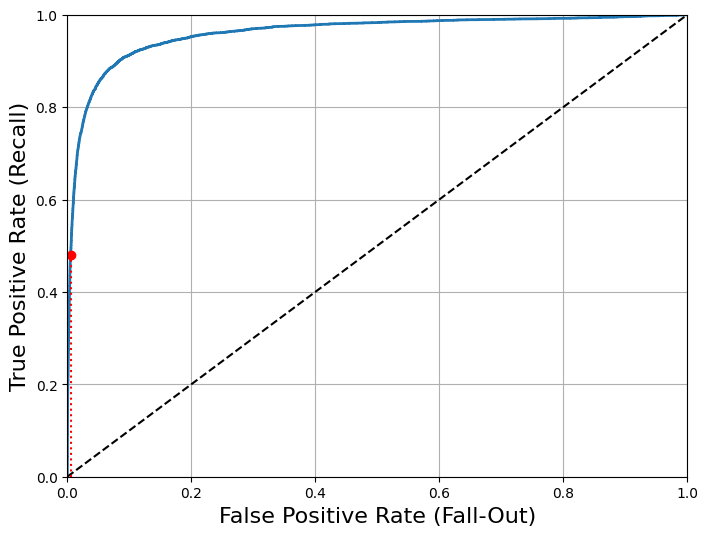

In [ ]:
''' plot the ROC curve'''
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [ ]:
'''one way to compare classifiers is to calculate the area under the curve'''
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_train_5, y_scores));

0.9604938554008616


In [ ]:
''' let's create a RandomForestClassifier to compare performance to the Stochastic Gradient classifier'''
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42);
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba");

In [ ]:
'''gather the class probabilities (instead of scores) and calculate the roc curve'''
y_scores_forest = y_probas_forest[:,1];
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest);

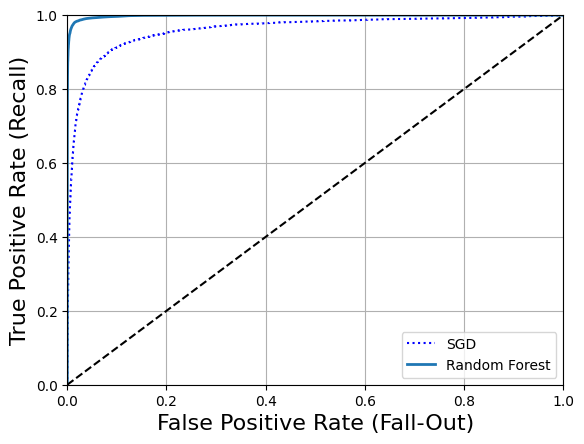

In [ ]:
''' plot the ROC curves for the SGD and RFC'''
plt.plot(fpr, tpr, "b:", label="SGD");
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest");
plt.legend(loc="lower right");
plt.show();

In [ ]:
''' calculate the area under the curve for the Random Forest model'''
print(roc_auc_score(y_train_5, y_scores_forest));

0.9983436731328145


In [ ]:
'''instead of a binary classifier, let's create a multiclass classifier'''
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train);


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
''' make the prediction'''
print(svm_clf.predict([some_digit]));

[5]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
''' confirm it created scores for each of the 10 classes'''
some_digit_scores = svm_clf.decision_function([some_digit]);
print(some_digit_scores);
print("P:", svm_clf.predict([some_digit]))

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
P: [5]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
print("Top Position:",np.argmax(some_digit_scores));
print("Confirm the class:",svm_clf.classes_[5]);

Top Position: 5
Confirm the class: 5


In [ ]:
''' exlpicitly call a OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train);

print("Prediction:",ovr_clf.predict([some_digit]));
print("Number of estimators:", ovr_clf.estimators_);'''

KeyboardInterrupt: ignored

In [ ]:
sgd_clf.fit(X_train, y_train);


Prediction: [3]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Prediction:",sgd_clf.predict([some_digit]));

Prediction: [3]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(sgd_clf.decision_function([some_digit]));

[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Cross Value Score:", cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"));

Cross Value Score: [0.87365 0.85835 0.8689 ]


In [ ]:
'''Scale the inputs to see if you get improved accuracy'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64));
print("CVS with scaled inputs:",cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"));

CVS with scaled inputs: [0.8983 0.891  0.9018]


In [ ]:
'''print the confusion matrix so that we can start doing error analysis'''
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3);
conf_mx = confusion_matrix(y_train, y_train_pred);
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

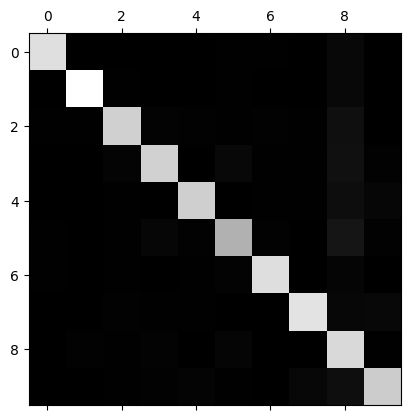

In [ ]:
'''plot the confusion matrix'''
plt.matshow(conf_mx, cmap=plt.cm.gray);
plt.show();

In [ ]:
'''define the error rates so we can highlight them in a plot'''
row_sums = conf_mx.sum(axis=1, keepdims=True);
norm_conf_mx = conf_mx / row_sums;

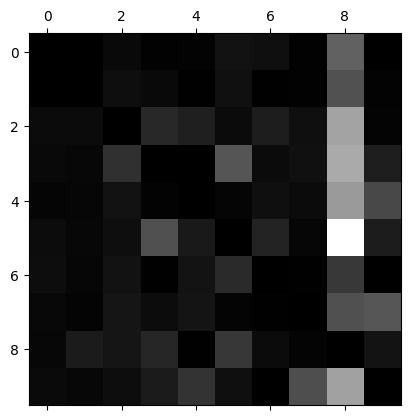

In [ ]:
'''plot the error rates'''
np.fill_diagonal(norm_conf_mx, 0);
plt.matshow(norm_conf_mx, cmap=plt.cm.gray);
plt.show();

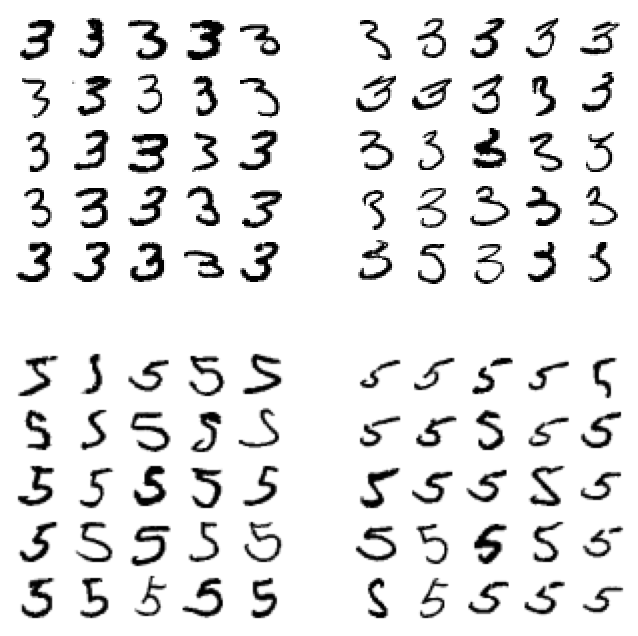

In [ ]:
''' show some of the images that are providing false positives and false negatives'''
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
#save_fig("error_analysis_digits_plot")
plt.show()

In [ ]:
'''create a KNeighborsClassifer in order to experiment with multi-label models'''
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7);
y_train_odd = (y_train % 2 == 1);
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier();
knn_clf.fit(X_train, y_multilabel);

In [ ]:
print("KNN Predict:",knn_clf.predict([some_digit]));

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Predict: [[False  True]]


In [ ]:
''' calculate f1_score on the multi-label classifier'''
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3);
f1_score(y_multilabel, y_train_knn_pred, average="macro");

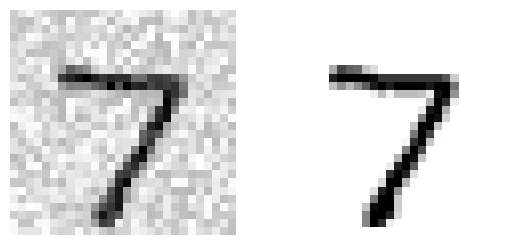

In [ ]:
'''as a multi-output classifier example, let's create data with noise that can be transformed to an image without noise'''
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

'''let's use the predictor to remove the noise, then plot the result'''
def plot_digit(data):
    image = data.values.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

some_index = 0
plt.subplot(121); 
plot_digit(X_test_mod.iloc[some_index])
plt.subplot(122); 
plot_digit(y_test_mod.iloc[some_index])
#save_fig("noisy_digit_example_plot")
plt.show()